
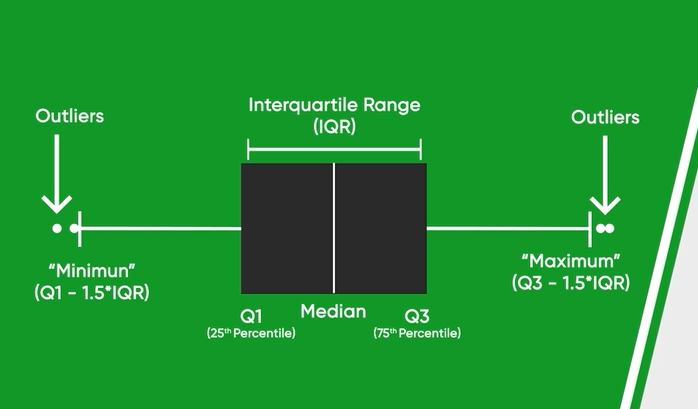

## When the Data is Skewed we use IQR technique

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("scholarship.csv")

In [4]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


<Axes: xlabel='scholarship_exam_marks', ylabel='Count'>

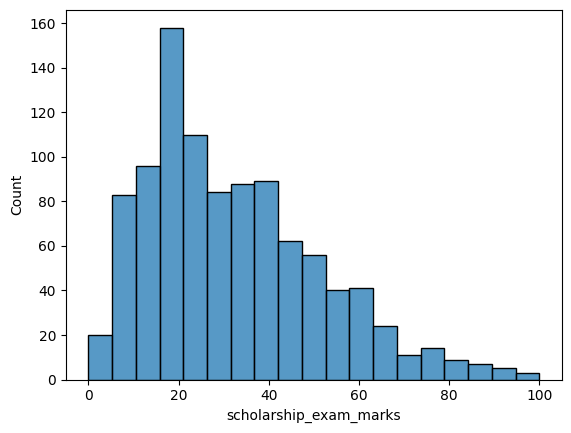

In [5]:
sns.histplot(data["scholarship_exam_marks"])

In [ ]:
data["scholarship_exam_marks"].skew() # skewness = (n / ((n - 1) * (n - 2))) * sum(((data - mean) / std) ** 3)


0.8356419499466834

In [7]:
data["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: ylabel='scholarship_exam_marks'>

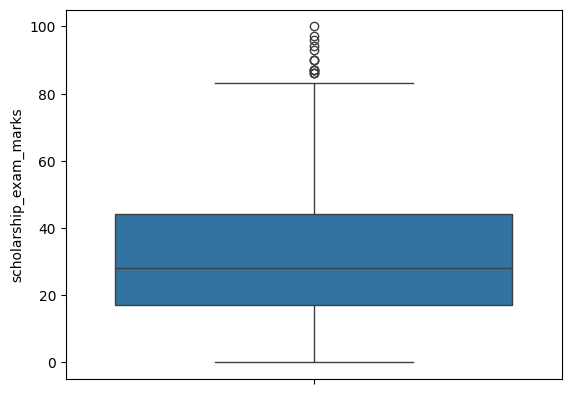

In [8]:

sns.boxplot(data["scholarship_exam_marks"])

In [ ]:
percentile25 = data["scholarship_exam_marks"].quantile(0.25) # This calculates the 25th percentile (Q1) of the "scholarship_exam_marks" column, which is the value below which 25% of the data falls.

percentile75 = data["scholarship_exam_marks"].quantile(0.75) # This calculates the 75th percentile (Q3) of the "scholarship_exam_marks" column, which is the value below which 75% of the data falls.



## Finding the Interquartile Range

In [10]:
IQR = percentile75 - percentile25 # This calculates the interquartile range (IQR) of the "scholarship_exam_marks" column.
print("The Interquartile Range is ",IQR)

The Interquartile Range is  27.0


In [11]:

min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR


## Trimming the Data

In [ ]:
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]
# This filters out the rows of the "data" DataFrame where the "scholarship_exam_marks" column values are greater than the "min" value and less than the "max" value.

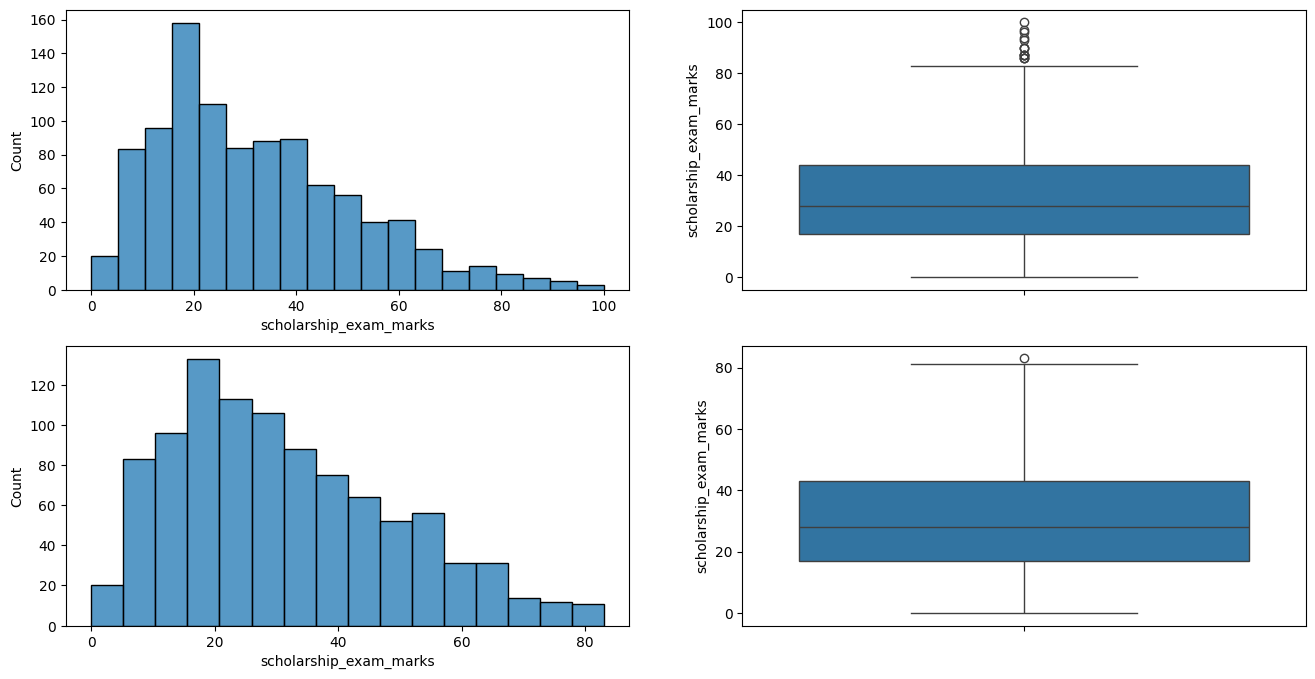

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.histplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

## Capping the Data (Instead of Trimming)

In [15]:
new_data2=data.copy()
new_data2["scholarship_exam_marks"]=np.where(new_data2["scholarship_exam_marks"]<min, min, new_data2["scholarship_exam_marks"])
new_data2["scholarship_exam_marks"]=np.where(new_data2["scholarship_exam_marks"]>max, max, new_data2["scholarship_exam_marks"])


In [16]:

new_data2.shape

(1000, 3)

In [17]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64